In [1]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd

In [2]:

import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DaveBabbitt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:

import string
from nltk.corpus import stopwords

# Load the stop words
STOP_WORDS = set(stopwords.words('english'))

# Define a translation table for removing punctuation marks
TRANSLATION_TABLE = str.maketrans('', '', string.punctuation)

def preprocess_abstract(abstract):
    """
    Preprocess a list of sentences representing an abstract by
    removing stop words and punctuation, converting to lowercase,
    and joining the words into a single string of space-delimited tokens.
    
    Parameters:
    abstract (list): A list of strings representing sentences in an abstract.
    
    Returns:
    str: A preprocessed string representing the entire abstract.
    """
    # Loop over each sentence in the abstract and preprocess it
    preprocessed_sentences = []
    for sentence in abstract:
        # Remove punctuation marks
        sentence = sentence.replace('-', ' ')
        sentence = sentence.translate(TRANSLATION_TABLE)
        
        # Convert to lowercase
        sentence = sentence.lower()
        
        # Remove stop words
        words = sentence.split()
        filtered_words = [word for word in words if word not in STOP_WORDS]
        
        # Join the words
        preprocessed_sentence = ' '.join(filtered_words)
        
        # Add the preprocessed sentence to the list
        preprocessed_sentences.append(preprocessed_sentence)
    
    # Join the preprocessed sentences into a single string
    preprocessed_abstract = ' '.join(preprocessed_sentences)
    
    return preprocessed_abstract

vectorizer = TfidfVectorizer()
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, n_init='auto')

In [4]:

# Preprocess the text data
file_path = '../data/txt/ta3_tasks.txt'
tasks_list = []
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        line = line.strip()
        if line:
            tasks_list.append(line)

In [5]:

# Get the proposal tasks
start_idx = tasks_list.index('Proposal Tasks:') + 1
end_idx = tasks_list.index('Evaluation Tasks:')
proposal_tasks_list = tasks_list[start_idx:end_idx]

In [6]:

# Get the evaluation tasks
start_idx = tasks_list.index('Evaluation Tasks:') + 1
end_idx = tasks_list.index('Optional Tasks:')
evaluation_tasks_list = tasks_list[start_idx:end_idx]

In [8]:

for evaluation_task in evaluation_tasks_list:
    if ('align' in evaluation_task.lower()):
        print(evaluation_task)

Assess the willingness of humans to delegate difficult decisions to TA2’s human-aligned algorithmic decision-makers.
Develop decision-makers that can be used to test the alignment score (with a human trust scale) in controlled ways.
Evaluate TA1’s ability to: 1) characterize decision-makers and to 2) generate meaningful alignment scores for an algorithmic decision-maker, such as those produced by TA2.
Explain any elements of psychological fidelity that may not be well aligned with the proposed environments.
Hold out a set of probes that elicited the same attributes from the trusted decision-makers, and use those to verify that TA2’s aligned algorithm is expressing attributes within the designated geometric region.
Identify self-report trust measures that are appropriate as a comparison for the TA1 alignment score and justify why those particular trust measures are preferred.
Participate in a peer review process for the TA1 and TA2 alignment process, including reviewing scenario and pro

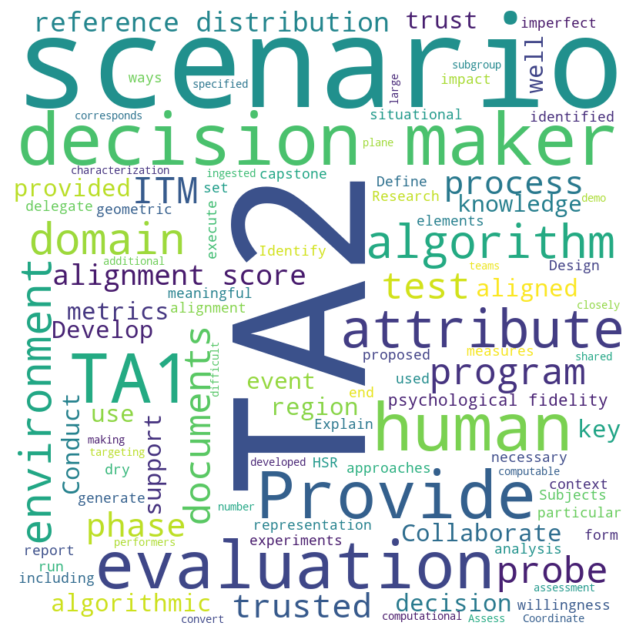

In [8]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud object
wordcloud = WordCloud(
    width=800, height=800, background_color='white', max_words=100, stopwords=STOP_WORDS, min_font_size=10
).generate(' '.join(evaluation_tasks_list))

# Plot the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:

# left_lim, right_lim = ax.get_xlim()
# print(left_lim, right_lim)
# xlim_tuple = ax.set_xlim(left=left_lim, right=right_lim)

In [10]:

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

fig_width = 18
aspect_ratio = 9/16

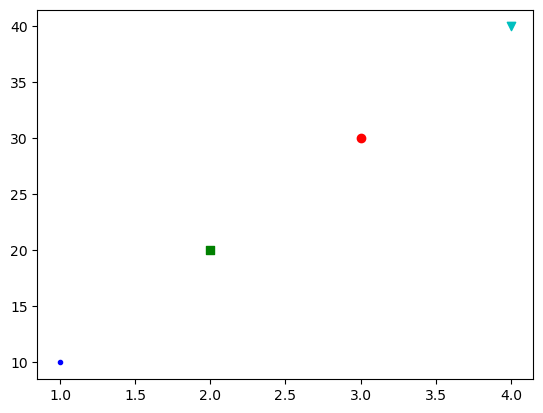

In [11]:

from cycler import cycler
from matplotlib._color_data import BASE_COLORS

# Define your x and y lists
x = [1, 2, 3, 4]
y = [10, 20, 30, 40]

# Zip your x and y lists with the dictionary cycle
for i, (x_val, y_val, color_dict, marker_dict) in enumerate(
    zip(x, y, cycler('color', BASE_COLORS.keys()), cycler('marker', plt.Line2D.markers.keys()))
):
    plt.scatter(x_val, y_val, c=color_dict['color'], marker=marker_dict['marker'])

In [12]:

# Perform PCA on the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Perform TruncatedSVD on the data
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

# Perform TSNE on the data
tsne = TSNE(n_components=2, perplexity=5, init='random')
X_tsne = tsne.fit_transform(X)

# Define labels and corresponding markers/colors
unique_labels = np.unique(labels)
num_labels = len(unique_labels)
markers = [x['marker'] for x in cycler('marker', plt.Line2D.markers.keys())[:num_labels]]
colors = plt.cm.get_cmap('tab10', num_labels)

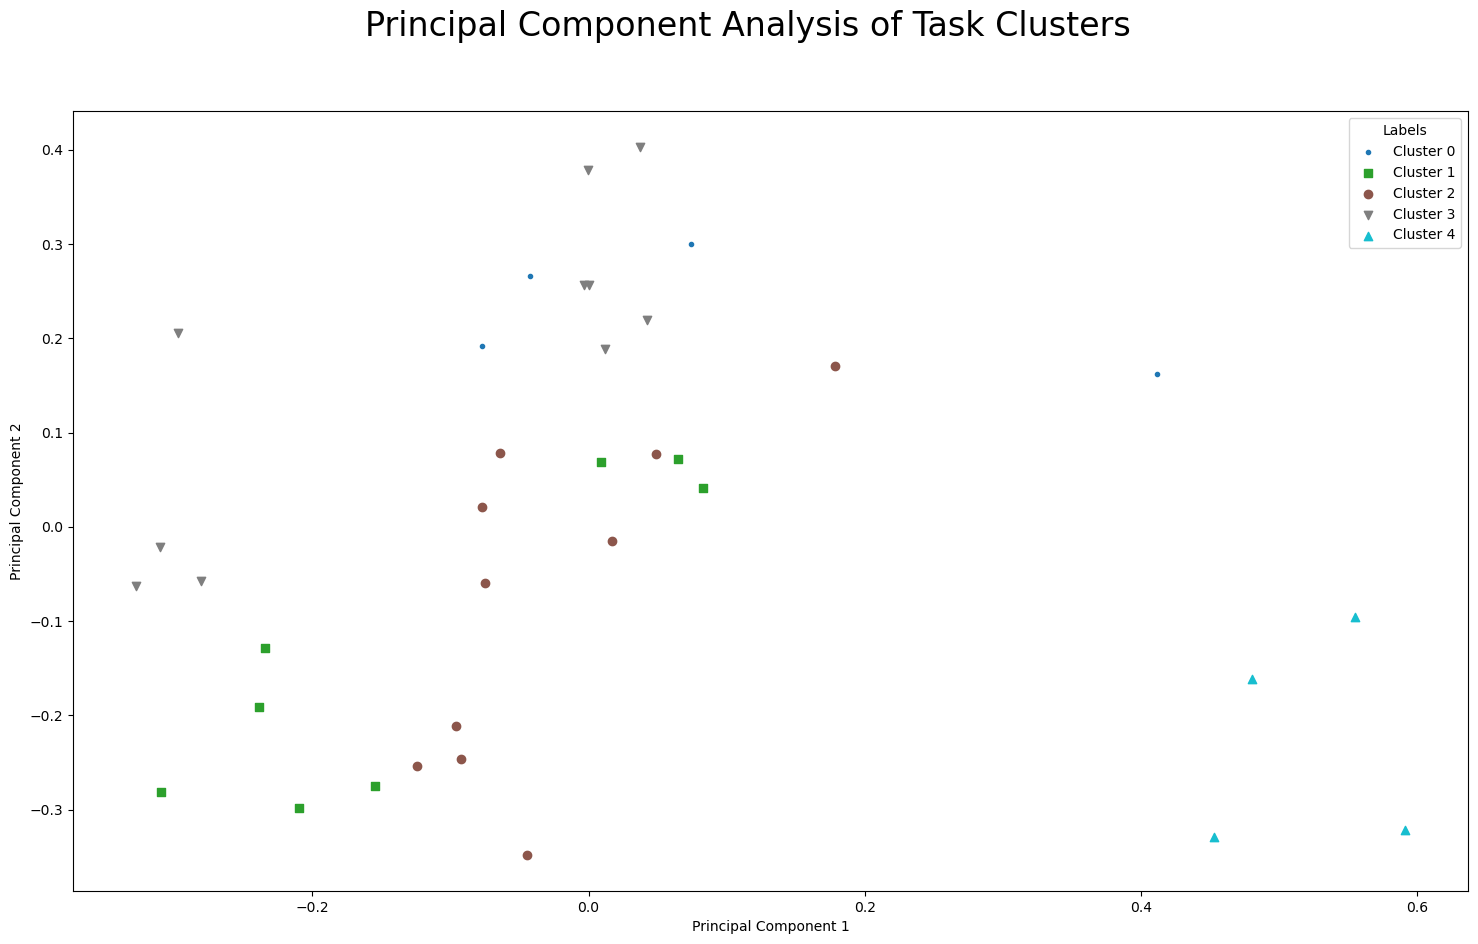

In [13]:

# Create the scatter plot with labeled data points
fig = plt.figure(figsize=(fig_width, fig_width * aspect_ratio))
ax = fig.add_subplot(111)
fig.suptitle('Principal Component Analysis of Task Clusters', fontsize=24)

# Visualize the data in 2D
for i, label in enumerate(unique_labels):
    indices = (labels == label)
    ax.scatter(X_pca[indices, 0], X_pca[indices, 1], c=np.array([list(colors(i))]), marker=markers[i], label=f'Cluster {label}')

# Set plot labels and show the legend
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.legend(title='Labels', bbox_to_anchor=(1.00, 1.00), loc='upper right')
plt.show()

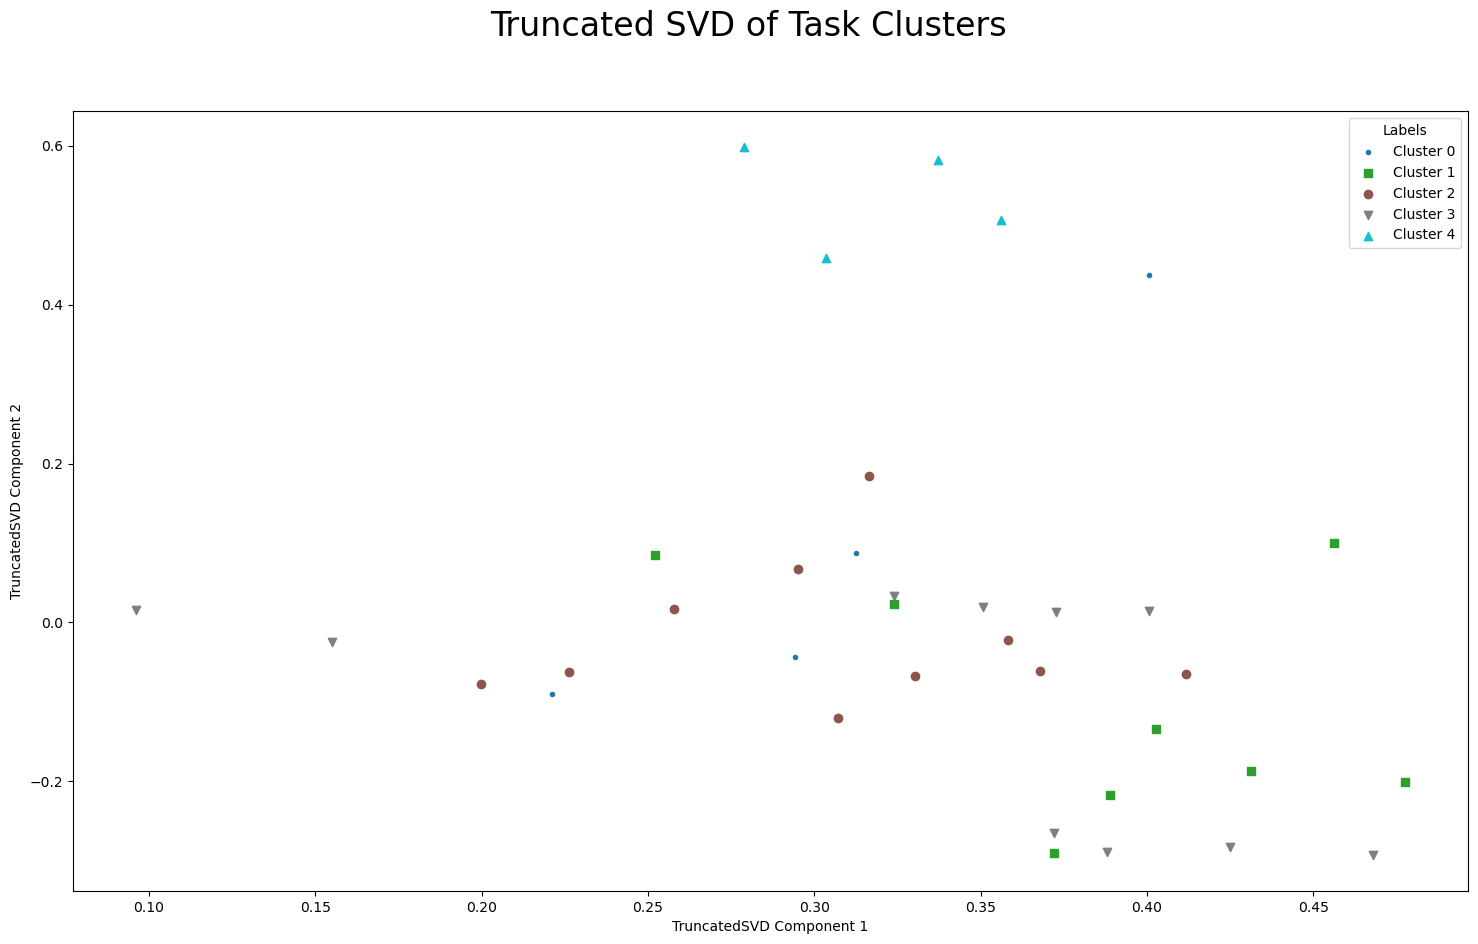

In [14]:

# Create the scatter plot with labeled data points
fig = plt.figure(figsize=(fig_width, fig_width * aspect_ratio))
ax = fig.add_subplot(111)
fig.suptitle('Truncated SVD of Task Clusters', fontsize=24)

# Visualize the data in 2D
for i, label in enumerate(unique_labels):
    indices = (labels == label)
    ax.scatter(X_svd[indices, 0], X_svd[indices, 1], c=np.array([list(colors(i))]), marker=markers[i], label=f'Cluster {label}')

# Set plot labels and show the legend
ax.set_xlabel('TruncatedSVD Component 1')
ax.set_ylabel('TruncatedSVD Component 2')
ax.legend(title='Labels', bbox_to_anchor=(1.00, 1.00), loc='upper right')
plt.show()

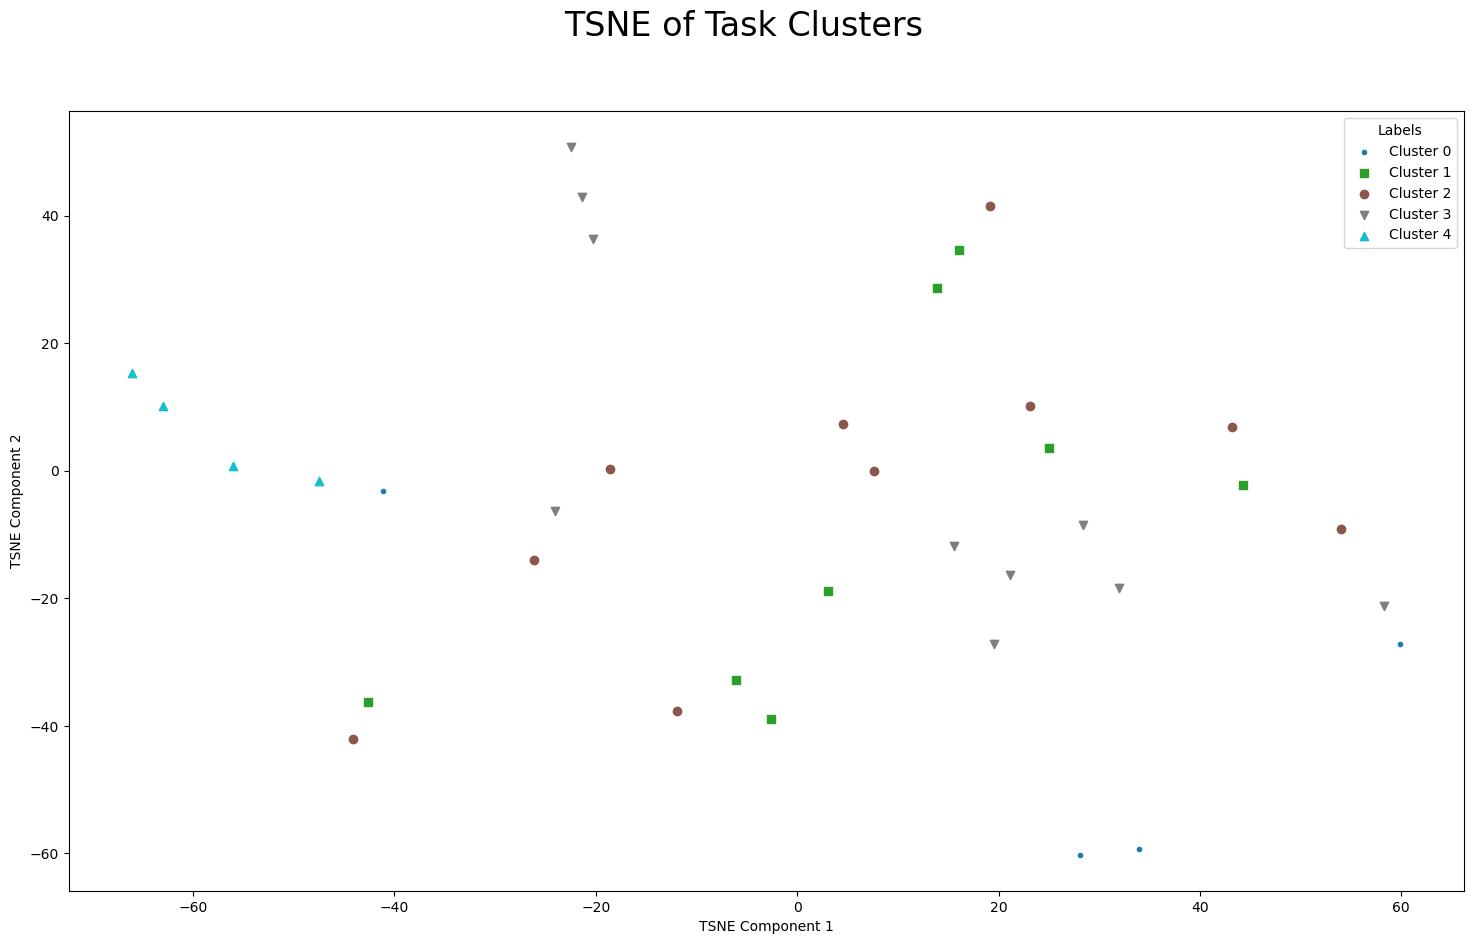

In [15]:

# Create the scatter plot with labeled data points
fig = plt.figure(figsize=(fig_width, fig_width * aspect_ratio))
ax = fig.add_subplot(111)
fig.suptitle('TSNE of Task Clusters', fontsize=24)

# Visualize the data in 2D
for i, label in enumerate(unique_labels):
    indices = (labels == label)
    ax.scatter(X_tsne[indices, 0], X_tsne[indices, 1], c=np.array([list(colors(i))]), marker=markers[i], label=f'Cluster {label}')

# Set plot labels and show the legend
ax.set_xlabel('TSNE Component 1')
ax.set_ylabel('TSNE Component 2')
ax.legend(title='Labels', bbox_to_anchor=(1.00, 1.00), loc='upper right')
plt.show()

In [24]:

import re

remainders_list = evaluation_tasks_list.copy()
sublist = [task_str for task_str in evaluation_tasks_list if re.search('(Human Subjects Research|HSR)', task_str)]
remainders_list = [element for element in remainders_list if element not in sublist]
sublist = [task_str for task_str in evaluation_tasks_list if re.search('psychological fidelity', task_str)]
remainders_list = [element for element in remainders_list if element not in sublist]

In [26]:

# Convert the text data into a numerical representation
X = vectorizer.fit_transform(remainders_list)

# Perform K-means clustering
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, n_init='auto')
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Print the clusters
for i in range(n_clusters):
    print()
    print(f'Cluster {i}:')
    for j, label in enumerate(labels):
        if label == i:
            print(f'Sentence {j}: {remainders_list[j]}')


Cluster 0:
Sentence 7: Define a geometric region in the plane of the attributes that corresponds to attributes of a large subgroup of the trusted humans.
Sentence 8: Develop decision-makers that can be used to test the alignment score (with a human trust scale) in controlled ways.
Sentence 11: During program evaluations, provide access to trusted human decision-makers with relevant expertise in the ITM domains (decision-maker pool) that are: 1) small in size, perhaps on the order of 3 to 5 individuals, and 2) drawn from a population of humans that are already trusted to make critical decisions in ITM domains.
Sentence 13: Hold out a set of probes that elicited the same attributes from the trusted decision-makers, and use those to verify that TA2’s aligned algorithm is expressing attributes within the designated geometric region.

Cluster 1:
Sentence 3: Collaborate with TA1 performers on computational representations for the scenarios, probes, and scenario context.
Sentence 6: Coordina

In [27]:

[task_str for task_str in evaluation_tasks_list if re.search('[hH]uman', task_str)]

['Assess the willingness of humans to delegate difficult decisions to TA2’s human-aligned algorithmic decision-makers.',
 'Define a geometric region in the plane of the attributes that corresponds to attributes of a large subgroup of the trusted humans.',
 'Define the number and types of participants necessary for meaningful Human Subjects Research (HSR) experiments.',
 'Design and execute Human Subjects Research (HSR) experiments that execute the program evaluation, in accordance with the program provided metrics.',
 'Develop decision-makers that can be used to test the alignment score (with a human trust scale) in controlled ways.',
 'During program evaluations, provide access to trusted human decision-makers with relevant expertise in the ITM domains (decision-maker pool) that are: 1) small in size, perhaps on the order of 3 to 5 individuals, and 2) drawn from a population of humans that are already trusted to make critical decisions in ITM domains.',
 'Provide a quantitative analys

In [28]:

[task_str for task_str in evaluation_tasks_list if re.search('delegate', task_str)]

['Assess the willingness of humans to delegate difficult decisions to TA2’s human-aligned algorithmic decision-makers.',
 'Provide a quantitative analysis of humans’ willingness to delegate to ITM algorithms versus algorithms that do not implement the key attributes identified by TA1.']

In [29]:

[task_str for task_str in evaluation_tasks_list if re.search('attribute', task_str)]

['Define a geometric region in the plane of the attributes that corresponds to attributes of a large subgroup of the trusted humans.',
 'Hold out a set of probes that elicited the same attributes from the trusted decision-makers, and use those to verify that TA2’s aligned algorithm is expressing attributes within the designated geometric region.',
 'Provide a quantitative analysis of humans’ willingness to delegate to ITM algorithms versus algorithms that do not implement the key attributes identified by TA1.',
 'Provide key attributes, reference distribution, and alignment scoring framework to TA2.',
 'Provide one or more reference distributions (with attributes that are consistent with those identified by TA1) along with the probes that were used to generate the distribution.',
 'Provided TA2 with information on a particular human decision-maker in the form of the decision-maker attributes and their reference distribution.',
 'Test a baseline TA2 algorithm to understand what attribut

In [30]:

[task_str for task_str in evaluation_tasks_list if re.search('decision', task_str)]

['Assess the willingness of humans to delegate difficult decisions to TA2’s human-aligned algorithmic decision-makers.',
 'Collaborate with TA1 and TA2 to convert documents into a shared computable representation that can be ingested by the decision-making algorithms.',
 'Conduct a dry run evaluation of the algorithmic decision-makers and the decision-maker characterization approaches in each phase.',
 'Develop decision-makers that can be used to test the alignment score (with a human trust scale) in controlled ways.',
 'During program evaluations, provide access to trusted human decision-makers with relevant expertise in the ITM domains (decision-maker pool) that are: 1) small in size, perhaps on the order of 3 to 5 individuals, and 2) drawn from a population of humans that are already trusted to make critical decisions in ITM domains.',
 'Evaluate TA1’s ability to: 1) characterize decision-makers and to 2) generate meaningful alignment scores for an algorithmic decision-maker, such a